In [1]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [2]:
pip install tensorflow==1.14

     |████████████████████████████████| 109.3MB 76kB/s 
     |████████████████████████████████| 3.2MB 43.7MB/s 
     |████████████████████████████████| 491kB 44.9MB/s 
     |████████████████████████████████| 51kB 5.5MB/s 
  Found existing installation: tensorboard 2.4.1
    Uninstalling tensorboard-2.4.1:
      Successfully uninstalled tensorboard-2.4.1
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Found existing installation: tensorflow 2.4.1
    Uninstalling tensorflow-2.4.1:
      Successfully uninstalled tensorflow-2.4.1


In [1]:
import tensorflow as tf
print(tf.__version__)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

1.14.0


/usr/local/lib/python3.7/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:544: FutureWa

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

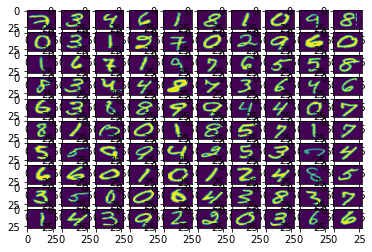

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data
mnist= input_data.read_data_sets("MNIST_data/" , one_hot = True)
fig,ax = plt.subplots(10,10)

k=0
for i in range(10):
    for j in range(10):
        ax[i][j].imshow(mnist.train.images[k].reshape(28,28), aspect = "auto")
        k+=1
plt.show() 

In [3]:
print("Shape of the feature matrix : " , mnist.train.images.shape)

Shape of the feature matrix :  (55000, 784)


In [4]:
print("Shape of the target matrix : " , mnist.train.labels.shape)

Shape of the target matrix :  (55000, 10)


In [5]:
print("One hot encoding for 1st observation : " , mnist.train.labels[0])

One hot encoding for 1st observation :  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [6]:
print("One hot encoding for 1st observation : " , mnist.train.labels[1])

One hot encoding for 1st observation :  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [7]:
#Trainingline
x = tf.placeholder("float" ,[ None , 784])  
# Weights
w = tf.Variable(tf.zeros([784,10]))
# Bias
b = tf.Variable(tf.zeros([10]))


# Finind weights of sum of inputs + bias
y = tf.nn.softmax(tf.matmul(x,w)+b)

y_ = tf.placeholder("float" ,[ None , 10])  
cross_entropy = -tf.reduce_sum(y_*tf.log(y))
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [8]:
for i in range(1000):
  batch_xs , batch_ys  = mnist.train.next_batch(100)
  sess.run(train_step, feed_dict  = {x:batch_xs, y_:batch_ys})

In [9]:
correct_prediction = tf.equal(tf.argmax(y,1) , tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction , "float"))
print(sess.run(accuracy,feed_dict={x:mnist.test.images,y_:mnist.test.labels}))

0.9179
